In [ ]:
from google.colab import files
import pandas
import numpy
import io
import random
import matplotlib.pyplot as plt

# Membaca File EXCEL

In [ ]:
# Membaca file excel
uploaded = files.upload()
dataframe = pandas.read_excel(io.BytesIO(uploaded['Mahasiswa.xls']))
data = []

for i in range(len(dataframe)):
  data.append([dataframe['Id'][i],dataframe['Penghasilan'][i],dataframe['Penghasilan'][i]-dataframe['Pengeluaran'][i]])
data


Saving Mahasiswa.xls to Mahasiswa.xls


[[1, 18.76, 9.080000000000002],
 [2, 8.35, 3.83],
 [3, 17.03, 6.920000000000002],
 [4, 8.23, -1.0199999999999996],
 [5, 16.89, 9.9],
 [6, 15.19, 7.989999999999999],
 [7, 9.03, -0.3200000000000003],
 [8, 17.99, 10.889999999999999],
 [9, 17.09, 6.550000000000001],
 [10, 18.43, 10.69],
 [11, 5.78, -0.8799999999999999],
 [12, 14.29, 6.229999999999999],
 [13, 5.55, -0.7999999999999998],
 [14, 13.06, 4.24],
 [15, 17.69, 9.520000000000001],
 [16, 12.39, 2.610000000000001],
 [17, 16.6, 6.820000000000002],
 [18, 15.57, 5.890000000000001],
 [19, 9.96, 5.48],
 [20, 19.62, 11.340000000000002],
 [21, 15.29, 5.399999999999999],
 [22, 18.71, 9.25],
 [23, 14.42, 5.93],
 [24, 19.27, 9.059999999999999],
 [25, 6.48, -1.3699999999999992],
 [26, 14.0, 4.539999999999999],
 [27, 16.32, 8.9],
 [28, 18.03, 11.260000000000002],
 [29, 17.58, 7.369999999999997],
 [30, 18.47, 9.87],
 [31, 18.7, 9.129999999999999],
 [32, 16.54, 8.26],
 [33, 7.03, -3.079999999999999],
 [34, 17.81, 11.25],
 [35, 17.02, 9.489999999999

# Fuzzifikasi

In [ ]:
#Membership

#Penghasilan
def hasil_low(x):
  if x <= 5:
    return 1
  elif x > 10:
    return 0
  else:
    return (10 - x) / (10 - 5)

def hasil_high(x):
  if x <= 15:
    return 0
  elif x > 16:
    return 1
  else:
   return (x - 15) / (16 - 15)

def hasil_avg(x):
  if x <= 5 or x > 16:
    return 0
  elif x > 5 and x <= 11:
    return (x - 5) / (11 - 5)
  elif x > 11 and x <= 15.5:
    return 1
  elif x > 15.5 and x <= 16:
    return (16 - x) / (16 - 15.5)

#Sisa Penghasilan
def sisa_low(x):
  if x <= 0:
    return 1
  elif x > 3:
    return 0
  else:
    return (3 - x) / (3 - 0)

def sisa_high(x):
  if x <= 5:
    return 0
  elif x > 9:
    return 1
  else:
   return (x - 5) / (9 - 5)

def sisa_avg(x):
  if x <= 0 or x > 9:
    return 0
  elif x > 0 and x <= 4:
    return (x - 0) / (4 - 0)
  elif x > 4 and x <= 6:
    return 1
  elif x > 6 and x <= 9:
    return (9 - x) / (9 - 6)


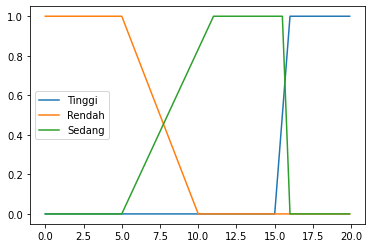

In [ ]:
plotGrafik = numpy.arange(0, 20, 0.1)
plt.plot(plotGrafik,[hasil_high(x) for x in plotGrafik], label='Tinggi')
plt.plot(plotGrafik,[hasil_low(x) for x in plotGrafik], label='Rendah')
plt.plot(plotGrafik,[hasil_avg(x) for x in plotGrafik], label='Sedang')
plt.legend()

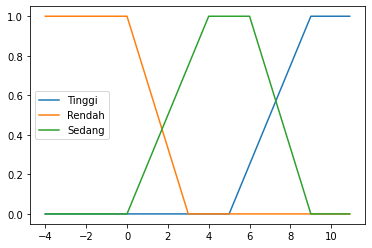

In [ ]:
plotGrafik = numpy.arange(-4, 11, 0.1)
plt.plot(plotGrafik,[sisa_high(x) for x in plotGrafik], label='Tinggi')
plt.plot(plotGrafik,[sisa_low(x) for x in plotGrafik], label='Rendah')
plt.plot(plotGrafik,[sisa_avg(x) for x in plotGrafik], label='Sedang')
plt.legend()

In [ ]:
penghasilan = []
sisa = []

for i in range(len(data)):
  penghasilan.append([data[i][0], hasil_high(data[i][1]), hasil_low(data[i][1]), hasil_avg(data[i][1])])
  sisa.append([data[i][0], sisa_high(data[i][2]), sisa_low(data[i][2]), sisa_avg(data[i][2])])

#end

# INFERENSI

| PENGHASILAN | SISA | STATUS |
| --- | --- | --- |
| TINGGI | TINGGI | DITOLAK  |
| TINGGI | SEDANG | DITOLAK |
| TINGGI | RENDAH | DITOLAK |
| SEDANG | TINGGI | DIPERTIMBANGKAN |
| SEDANG | SEDANG | DIPERTIMBANGKAN |
| SEDANG | RENDAH | DITERIMA |
| RENDAH | TINGGI | DITERIMA |
| RENDAH | SEDANG | DITERIMA |
| RENDAH | RENDAH | DITERIMA |

In [ ]:
nInference = []
for i in range(len(data)):
  listDiterima = []
  listDipertimbangkan = []
  listDitolak = []

  listDiterima.append(min(penghasilan[i][3], sisa[i][2]))
  listDiterima.append(min(penghasilan[i][2], sisa[i][1]))
  listDiterima.append(min(penghasilan[i][2], sisa[i][3]))
  listDiterima.append(min(penghasilan[i][2], sisa[i][2]))

  listDipertimbangkan.append(min(penghasilan[i][3], sisa[i][1]))
  listDipertimbangkan.append(min(penghasilan[i][3], sisa[i][3]))

  listDitolak.append(min(penghasilan[i][1], sisa[i][1]))
  listDitolak.append(min(penghasilan[i][1], sisa[i][3]))
  listDitolak.append(min(penghasilan[i][1], sisa[i][2]))

  nDiterima = numpy.max(listDiterima)
  nDipertimbangkan = numpy.max(listDipertimbangkan)
  nDitolak = numpy.max(listDitolak)

  nInference.append([data[i][0], nDiterima, nDipertimbangkan, nDitolak])



[[1, 0, 0, 1],
 [2, 0.33000000000000007, 0.5583333333333332, 0],
 [3, 0, 0, 0.6933333333333328],
 [4, 0.5383333333333334, 0, 0],
 [5, 0, 0, 1],
 [6, 0, 0.7474999999999998, 0.1899999999999995],
 [7, 0.6716666666666665, 0, 0],
 [8, 0, 0, 1],
 [9, 0, 0, 0.8166666666666664],
 [10, 0, 0, 1],
 [11, 0.844, 0, 0],
 [12, 0, 0.9233333333333338, 0],
 [13, 0.89, 0, 0],
 [14, 0, 1, 0],
 [15, 0, 0, 1],
 [16, 0.1299999999999996, 0.6525000000000003, 0],
 [17, 0, 0, 0.726666666666666],
 [18, 0, 0.8599999999999994, 0.5700000000000003],
 [19, 0.00799999999999983, 0.8266666666666668, 0],
 [20, 0, 0, 1],
 [21, 0, 1.0, 0.28999999999999915],
 [22, 0, 0, 1],
 [23, 0, 1.0, 0],
 [24, 0, 0, 1],
 [25, 0.704, 0, 0],
 [26, 0, 1, 0],
 [27, 0, 0, 0.9750000000000001],
 [28, 0, 0, 1],
 [29, 0, 0, 0.5924999999999994],
 [30, 0, 0, 1],
 [31, 0, 0, 1],
 [32, 0, 0, 0.815],
 [33, 0.594, 0, 0],
 [34, 0, 0, 1],
 [35, 0, 0, 1],
 [36, 0, 0.7600000000000001, 0],
 [37, 0, 1, 0],
 [38, 0.8233333333333333, 0, 0],
 [39, 0.39600000000

# Defuzzifikasi

In [ ]:
nKelayakan = []

for i in range(len(data)):
  nKelayakan.append([data[i][0], ( (nInference[i][1]*80) + (nInference[i][2]*50) + (nInference[i][3]*40)) / (nInference[i][1] + nInference[i][2] + nInference[i][3])])

# MAIN PROGRAM

In [ ]:
def sorting(val):
  return val[1]

nKelayakan.sort(key = sorting, reverse = True)

id = []
persentase = []

for i in range(20):
  id.append(nKelayakan[i][0])
  persentase.append(nKelayakan[i][1])

print('20 orang yang terpilih adalah : ', id)
print()
print('Dengan Nilai : ', persentase)

20 orang yang terpilih adalah :  [4, 7, 11, 13, 25, 33, 38, 41, 46, 47, 49, 50, 52, 66, 69, 75, 79, 81, 94, 99]

Dengan Nilai :  [80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0]


# FILE Bantuan.xlsx

In [ ]:
hasil = pandas.DataFrame(numpy.asarray(id), columns=['id'])
hasil.to_excel("Bantuan.xlsx", index=False)
files.download('Bantuan.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>